# Introduction

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In the current Project, a dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic is examined. By the end of the Project the factors that made people more likely to survive will be explained.

The obvious question that is created by examining the specific dataset is which are the factors that affected the survival of the passengers. As already mentioned, the most significant seem to be the gender, the age, and the socio-economic status.  
  
During the current analysis, we will evaluate the significance of the above factors and we will try to explain the variation of the survival rates across other variables.

# About the Data

The Dataset is a highly structured dataset consisted of the following attributes:

VARIABLE DESCRIPTIONS:

|Variable|Description                                                         |
|--------|--------------------------------------------------------------------|
|survival|Survival (0 = No; 1 = Yes)                                          |
|pclass  |Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)                         |
|name    |Name                                                                |
|sex     |Sex                                                                 |
|age     |Age                                                                 |
|sibsp   |Number of Siblings/Spouses Aboard                                   |
|parch   |Number of Parents/Children Aboard                                   |
|ticket  |Ticket Number                                                       |
|fare    |Passenger Fare                                                      |
|cabin   |Cabin                                                               |
|embarked|Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)|

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)  
1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)  
If the Age is Estimated, it is in the form xx.5  

With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.  The following are the definitions used for sibsp and parch.  

* Sibling: Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic  
* Spouse:  Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)  
* Parent:  Mother or Father of Passenger Aboard Titanic  
* Child:   Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic  

Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws.  Some children traveled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

## Loading the Dataset and the necessary libraries

In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import math
import numpy as np
from IPython.display import Image
from scipy.stats import norm
from scipy.stats import stats

In [2]:
#Loading the data to a dataframe
#"titanic_original" will be the initial dataframe.
#All following dataframes will be alterations of "titanic_original"
filename = "titanic_data.csv"
titanic_original = pd.read_csv(filename)

# Preparing the Data

## Checking Data Types

Before trying any data cleaning, let's visualize the Dataset and check the Data Types of its fields.

In [3]:
#Previewing the data
titanic_original.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#Print the data types of each column
titanic_original.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

The Data Types are the expected, so there is no need for any corrections on this level.

## Checking Completeness

Next, we will check the Dataset for any missing values.

In [5]:
#Count the number of values on each column
titanic_original.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

There are some missing values in **Age**, **Cabin** and **Port of Embarkation** variables.  

We will not drop any records right now. Any drops will take place when we will examine the specific factors.

## Investigating Data Problems

Next, we will check for any surprising values in our Dataset. The expected values for each variable are listed in the following table:  
  
|Variable   |Expected Data                                                                                    |
|-----------|-------------------------------------------------------------------------------------------------|
|PassengerId|Continuous Integers, starting from "1" and ending to "891"                                       |
|Survived   |Integer of values "0" or "1"                                                                     |
|Pclass     |Integer of values "1", "2", or "3"                                                               |
|Name       |(Nothing to check here)                                                                          |
|Sex        |"male" or "female"                                                                               |
|Age        |Min and Max values should make sense                                                             |
|SibSp      |Min and Max values should make sense                                                             |
|Parch      |Min and Max values should make sense                                                             |
|Ticket     |(Nothing to check here)                                                                          |
|Fare       |Min and Max values should make sense                                                             |
|Cabin      |There should be one value per record and the values should be in the format DeckCabin# (e.g C128)|
|Embarked   |The values should be either "C", "Q", or "S"                                                     |

### PassengerId

In [6]:
#Calculating the min/max values, the # of values and the existance of duplicates
min_val = titanic_original["PassengerId"].min()
max_val = titanic_original["PassengerId"].max()
num_val = titanic_original["PassengerId"].count()
dup_val = titanic_original.duplicated(subset=["PassengerId"]).sum()

d = [min_val, max_val, num_val, dup_val]
i = ["Min Value", "Max Value", "Number of values", "Duplicate values"]

df = pd.DataFrame({"PassengerId":d}, index=i)
df

,PassengerId
Min Value,1
Max Value,891
Number of values,891
Duplicate values,0


Since the minimum value is *1*, the maximum *891*, with 891 entries and no duplicates, the *PassengerId* is a continuous integer from 1 to 891.  
  
-----  
  
### Survived

In [7]:
#Finding unique values in "Survived" column
titanic_original["Survived"].unique()

array([0, 1])

The *Survived* column contains the expected values.  

It may sound a good idea to turn this variable to a boolean, but letting it as a integer will help us later to calculate the survival rates.  
More specifically, since "0" indicates non-survival and "1" survival, the average "Survived" of a sample (e.g. a group of passengers) equals the Survival Rate of the sample.  
  
---  
  
### Pclass

In [8]:
#Finding unique values in "Pclass" column
titanic_original["Pclass"].unique()

array([3, 1, 2])

The *Pclass* column contains the expected values.  
  
---  
  
### Sex

In [9]:
#Finding unique values in "Sex" column
titanic_original["Sex"].unique()

array(['male', 'female'], dtype=object)

The *Sex* column contains the expected values.  
  
---  
  ### Age

In [10]:
#Finding Min/Max values in "Age" column
min_val = titanic_original["Age"].min()
max_val = titanic_original["Age"].max()

d = [min_val, max_val]
i=["Min Value", "Max Value"]

df = pd.DataFrame({"Age":d}, index=i)
df

,Age
Min Value,0.42
Max Value,80.00


The *Age* column contains non surprising values.  
  
---  
  
### SibSp

In [11]:
#Finding Min/Max values in "SibSp" column
min_val = titanic_original["SibSp"].min()
max_val = titanic_original["SibSp"].max()

d = [min_val, max_val]
i=["Min Value", "Max Value"]

df = pd.DataFrame({"SibSp":d}, index=i)
df

,SibSp
Min Value,0
Max Value,8


The *SibSp* column contains non surprising values. 
  
---  
  
### Parch

In [12]:
#Finding Min/Max values in "Parch" column
min_val = titanic_original["Parch"].min()
max_val = titanic_original["Parch"].max()

d = [min_val, max_val]
i=["Min Value", "Max Value"]

df = pd.DataFrame({"Parch":d}, index=i)
df

,Parch
Min Value,0
Max Value,6


The *Parch* column contains non surprising values. 
  
---  
  
### Fare

In [13]:
#Finding Min/Max values in "Fare" column
min_val = titanic_original["Fare"].min()
max_val = titanic_original["Fare"].max()

d = [min_val, max_val]
i=["Min Value", "Max Value"]

df = pd.DataFrame({"Fare":d}, index=i)
df

,Fare
Min Value,0.0000
Max Value,512.3292


In [14]:
#Finding the # of "0" fare records
(titanic_original["Fare"] == 0).astype(int).sum()

15

We can see that there are 15 "0" fares which looks strange.  
Let's take a closer look on these records:

In [15]:
#Return all records with "0" fare
titanic_original[titanic_original["Fare"] == 0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
179,180,0,3,"Leonard, Mr. Lionel",male,36.0,0,0,LINE,0.0,NaN,S
263,264,0,1,"Harrison, Mr. William",male,40.0,0,0,112059,0.0,B94,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0,NaN,S
277,278,0,2,"Parkes, Mr. Francis ""Frank""",male,NaN,0,0,239853,0.0,NaN,S
302,303,0,3,"Johnson, Mr. William Cahoone Jr",male,19.0,0,0,LINE,0.0,NaN,S
413,414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0,NaN,S
466,467,0,2,"Campbell, Mr. William",male,NaN,0,0,239853,0.0,NaN,S
481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0,NaN,S
597,598,0,3,"Johnson, Mr. Alfred",male,49.0,0,0,LINE,0.0,NaN,S
633,634,0,1,"Parr, Mr. William Henry Marsh",male,NaN,0,0,112052,0.0,NaN,S


There are some obvious similarities.  
All of them were males, embarked in Southampton and only one survived.  
The above facts make them look like crew members but further investigation to https://www.encyclopedia-titanica.org/ reveals that they were not.  
Instead, it seems that they had some relation with the White Star Line, owner of RMS Titanic.  

For example,  

**Mr Francis Parkes** was a member of *Harland & Wolff : Titanic Guarantee Group*, a Belfast team sent by shipbuilders Harland & Wolff to accompany the Titanic on her maiden voyage.  

Researching for **Leonard, Mr. Lionel** led me to the following reference:  
"*It is believed Shannon worked for the American Line and possibly held US citizenship, using the name **Lionel Leonard** for reasons unknown. By 1912 he was quartermaster of the SS Philadelphia but the coal strike caused scheduling problems and Philadelphia"s westbound voyage was canceled, with Andrew and several other shipmates (August Johnson, **William Cahoone Jr. Johnson**, Alfred John Carver, Thomas Storey and  **William Henry Törnquist**) forced to travel aboard Titanic as passengers.*" (https://www.encyclopedia-titanica.org/titanic-victim/lionel-leonard.html)  

The above facts lead to the conclusion that the "zero fare" passengers had some relation with the ship owner company and were traveling for free.  
(A detailed investigation of all the above names would be out of scope of the specific project.)  
  
----  
  
### Cabin

In [16]:
#Counting the number of cabins in each entry
titanic_original["Cabin"].str.split(" ", expand=True).count().rename(lambda x: x+1)

1    204
2     24
3      8
4      2
dtype: int64

We can see that:  
2   passengers have 4 registered cabins  
6   passengers have 3 registered cabins (8-2)  
14  passengers have 2 registered cabins (24-8-2)  
170 passengers have 1 registered cabin (204-24-8-2)

To further examine the *Cabin* data we will export them from the dataframe 

In [17]:
#Extracting, removing empty and splitting entries
cabin = titanic_original["Cabin"]
cabin = cabin.dropna()
cabin = cabin.str.split(" ", expand=True)

#As an example, print the entries that have 3 cabins.
cabin.dropna(subset=[1,2])

,0,1,2,3
27,C23,C25,C27,None
88,C23,C25,C27,None
311,B57,B59,B63,B66
341,C23,C25,C27,None
438,C23,C25,C27,None
679,B51,B53,B55,None
742,B57,B59,B63,B66
872,B51,B53,B55,None


Passengers with PassengerIds 27, 88, 341 and 438 looks to occupy the same cabins.

In [18]:
titanic_original.loc[[27, 88, 341, 438]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0,C23 C25 C27,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S


It seems that some families had booked more than one adjacent cabins.   
We assume that there is nothing wrong with the data.
  
---  
  
### Embarked

In [19]:
titanic_original["Embarked"].unique()

array(['S', 'C', 'Q', nan], dtype=object)

We were expecting some null values, so everything looks good here.  
  
---  
  
According to the above findings, no problematic data found, thus there isn't any wrangling actions to perform.

# Data Exploration

In the current section we will investigate the correlation of several factors with the Survival Rate.  
An initial investigation can be made between the non-categorical data by using the *pandas.DataFrame.corr()* function.

In [20]:
titanic_original.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


**A strong correlation between the Survival Rate and Pclass and Fare** can be seen.  
It seems that the higher the socio-economic status of the passenger the better the possibility of surviving the accident.  
  
Further investigation will take place.
  
There are also some other "secondary" correlations, not directly relevant with the answers we are looking for:  
* Negative correlation between the Age and the Passenger's Class (The younger passengers could not affort an expensive class" ticket)  
* Negative correlation between the Passenger's Class and the Fare (The "higher" the class, the more expensive the ticket)  
* Negative correlation between the Passenger's Age and the number of Siblings (The older the passenger the fewer siblings onboard)
* Positive correlation between the number of Spouses and the number of Siblings (Large families onboard constituted both from siblings and spouses)  

Also, it would be useful as a baseline to calculate the Survival Rate for the whole sample.

In [21]:
titanic_original["Survived"].mean()

0.3838383838383838

## Survival Rate per Passenger's Class

By calculating the average value of the *Survived* variable for each Class, we are calculating the Survival Rate of each Class.

In [22]:
#Create a grouped by "Pclass" DataFrame with the average "Survived"
#No need to dropna() because there are not NaN on "Pclass" or "Survived" variables

pclass_df = pd.DataFrame(data = titanic_original.groupby("Pclass").agg({"Survived" : "mean"}))
pclass_df.columns = ["Survival Rate"]
pclass_df

,Survival Rate
Pclass,
1,0.629630
2,0.472826
3,0.242363


The passengers of the 1st and 2nd Class had a greater than the average Survival Rate.

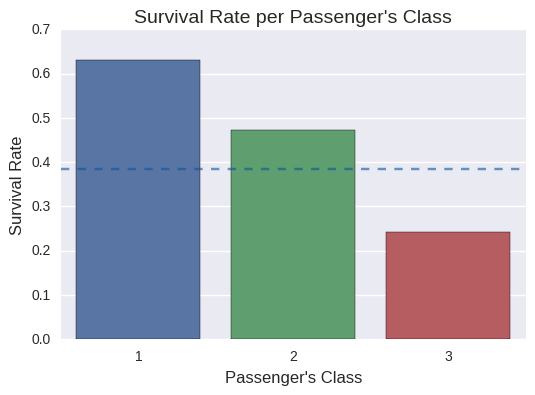

In [23]:
#Plotting the resulting DataFrame
plt.figure(figsize=(6,4))

p = sns.barplot(x="Pclass", y="Survival Rate", data=pclass_df.reset_index())

#Adding the average Survival Rate
plt.axhline(y=0.3838383838383838, ls='dashed', color='#0B559F', alpha=0.6)

plt.xlabel("Passenger's Class", fontsize=12)
plt.ylabel("Survival Rate", fontsize=12)
plt.title("Survival Rate per Passenger's Class", fontsize=14)

plt.show()

It is obvious that the "higher" (smaller number) the Passenger's Class, the higher the Survival Rate.  

## Survival Rate per Passenger's Gender

*"Women and children first" is a code of conduct whereby the lives of women and children are to be saved first in a life-threatening situation, typically abandoning ship, when survival resources such as lifeboats were limited*. (Source: https://en.wikipedia.org/wiki/Women_and_children_first)  
  
Let's see if the women on Titanic had a higher Survival Rate than the men.

In [24]:
#Create a grouped by "Sex" DataFrame with the average "Survived"
#No need to dropna() because there are not NaN on "Sex" or "Survived" variables
sex_df = pd.DataFrame(data = titanic_original.groupby("Sex").agg({"Survived" : "mean"}))
sex_df.columns = ["Survival Rate"]
sex_df

,Survival Rate
Sex,
female,0.742038
male,0.188908


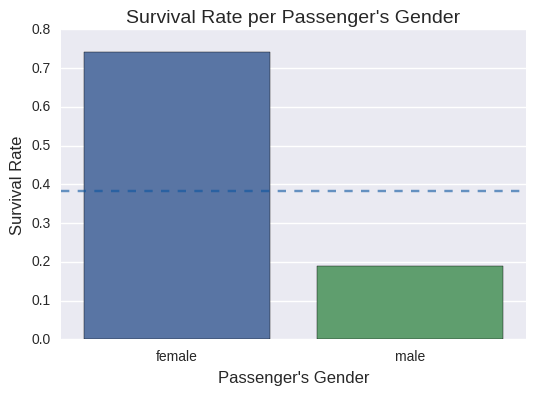

In [25]:
#Plotting the resulting DataFrame
plt.figure(figsize=(6,4))

p = sns.barplot(x="Sex", y="Survival Rate", data=sex_df.reset_index())

#Adding the average Survival Rate
plt.axhline(y=0.3838383838383838, ls='dashed', color='#0B559F', alpha=0.6)

p.set_xlabel("Passenger's Gender", fontsize=12)
p.set_ylabel("Survival Rate", fontsize=12)
p.set_title("Survival Rate per Passenger's Gender", fontsize=14)

plt.show()

The Women had over 4 times the Survival Rate of the men.  
So far, this is the most crucial factor of the Survival Rate.

## Survival Rate per Passenger's Age

Investigating the second group of the "Women and children first" code of conduct, we will analyze the Age as survival factor.  
  
Since the Age variable is comprised of almost indiscrete values, it will have very small practical value to group the DataFrame by Age. A better approach would be to group the passengers in "Decades" so that each passenger will be "moved" to the nearest decade.  
  
The subsets that will be created will be (0,5),[5,15),[15,25),[25,35),[35,45),[45,55),[55,65),[65,75),[75,85).

In [26]:
#Drop the NaN values
age_df=titanic_original.dropna(subset = ["Age"])

#A function that round the age to the neares decade
def decade(age):
    return (round(age/10)*10)

#Applying the "decade" function to the "Age" column
Decade = age_df[["Age"]].applymap(decade)
Decade.columns = ["Decade"]

#Concatenate the new column to the "age_df" DataSet
dec_df = pd.concat([age_df, Decade], axis = 1)

In [27]:
#Create a grouped by "Decade" DataFrame with the average "Survived"
#No need to dropna() because we have already droped the null values during the creation of the DataFrame
decade_df = pd.DataFrame(data = dec_df.groupby("Decade").agg({"Survived" : "mean"}))
decade_df.columns = ["Survival Rate"]
decade_df

,Survival Rate
Decade,
0.0,0.675000
10.0,0.473684
20.0,0.365000
30.0,0.388060
40.0,0.425000
50.0,0.410959
60.0,0.387097
70.0,0.000000
80.0,1.000000


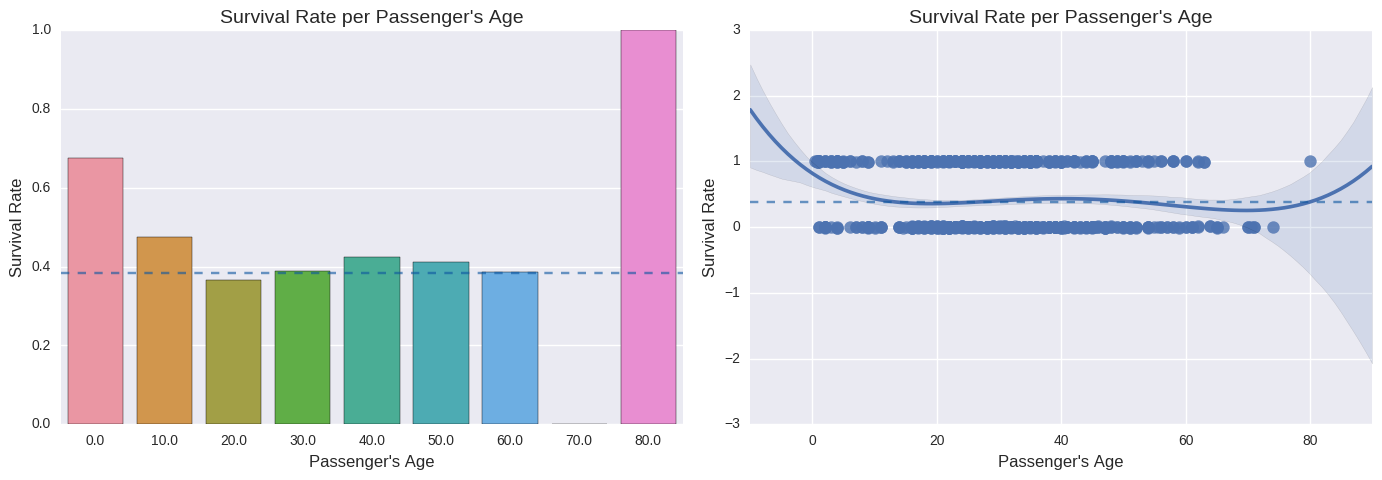

In [28]:
#Plotting the resulting DataFrame
fig = plt.subplots(figsize = (14, 5))

#Barplot
plt.subplot(121)

p = sns.barplot(x="Decade", y="Survival Rate", data=decade_df.reset_index())

#Adding the average Survival Rate
plt.axhline(y=0.3838383838383838, ls='dashed', color='#0B559F', alpha=0.6)

p.set_xlabel("Passenger's Age", fontsize=12)
p.set_ylabel("Survival Rate", fontsize=12)
p.set_title("Survival Rate per Passenger's Age", fontsize=14)

#Linear Regression
plt.subplot(122)

age_df=titanic_original.dropna(subset = ["Age"])

#An order of "4" has been selected so that the regression model will follow the histogram's trend
sns.regplot(x="Age", y="Survived", data=dec_df, order=4, y_jitter=0.01, scatter_kws={"s": 80});

#Adding the average Survival Rate
plt.axhline(y=0.3838383838383838, ls='dashed', color='#0B559F', alpha=0.6)

plt.xlabel("Passenger's Age", fontsize=12)
plt.ylabel("Survival Rate", fontsize=12)
plt.title("Survival Rate per Passenger's Age", fontsize=14)

plt.tight_layout()
plt.show()

In the above graphs, we can notice some extreme values to the right end of the scale (70: 0%, 80: 100%).
Let"s dig a little bit further by having a closer look at the passengers of these two subsets.

In [29]:
#Return all the rows with "Decade" 70 or more.
dec_df.loc[dec_df["Decade"] >= 70]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Decade
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S,70.0
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C,70.0
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C,70.0
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q,70.0
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q,70.0
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S,70.0
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C,70.0
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S,80.0
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S,70.0
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S,70.0


There were 10 passengers in the Decade 70 that none survived and only one in the Decade 80, who survived.  
The last one can be considered as an outlier and removed from the sample.

In [30]:
dec_df = dec_df.drop(630)
decade_df = pd.DataFrame(data = dec_df.groupby("Decade").agg({"Survived" : "mean"}))
decade_df.columns = ["Survival Rate"]
decade_df

,Survival Rate
Decade,
0.0,0.675000
10.0,0.473684
20.0,0.365000
30.0,0.388060
40.0,0.425000
50.0,0.410959
60.0,0.387097
70.0,0.000000


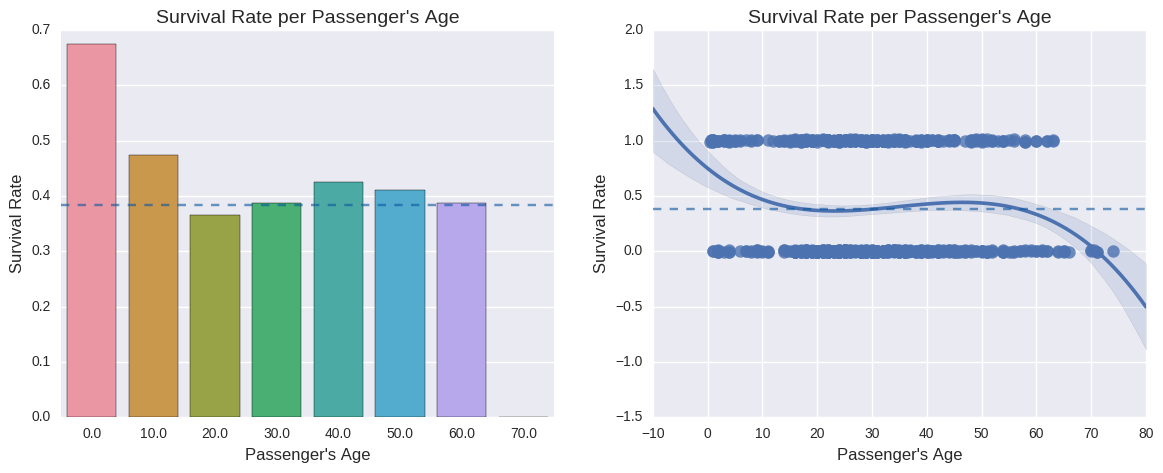

In [31]:
#Plotting again the resulting DataFrame
fig = plt.subplots(figsize = (14, 5))

#Barplot
plt.subplot(121)

p = sns.barplot(x="Decade", y="Survived", ci=None, data=dec_df.reset_index())

#Adding the average Survival Rate
plt.axhline(y=0.3838383838383838, ls='dashed', color='#0B559F', alpha=0.6)

p.set_xlabel("Passenger's Age", fontsize=12)
p.set_ylabel("Survival Rate", fontsize=12)
p.set_title("Survival Rate per Passenger's Age", fontsize=14)

#Linear Regression
plt.subplot(122)

#An order of "3" has been selected so that the regression model will follow the histogram's trend
sns.regplot(x="Age", y="Survived", data=dec_df, order=3, y_jitter=0.01, scatter_kws={"s": 80});

#Adding the average Survival Rate
plt.axhline(y=0.3838383838383838, ls='dashed', color='#0B559F', alpha=0.6)

plt.xlabel("Passenger's Age", fontsize=12)
plt.ylabel("Survival Rate", fontsize=12)
plt.title("Survival Rate per Passenger's Age", fontsize=14)

plt.show()

From the above results, we can conclude that the Age was a crucial factor for the survival of the passengers with the children under 15 having the greatest probability to survive.  

The rest of the variables could not affect (at least obviously) the Survival Rate but let's continue the analysis in case there are connections our intuition cannot spot.

## Survival Rate per Number of Siblings/Spouses

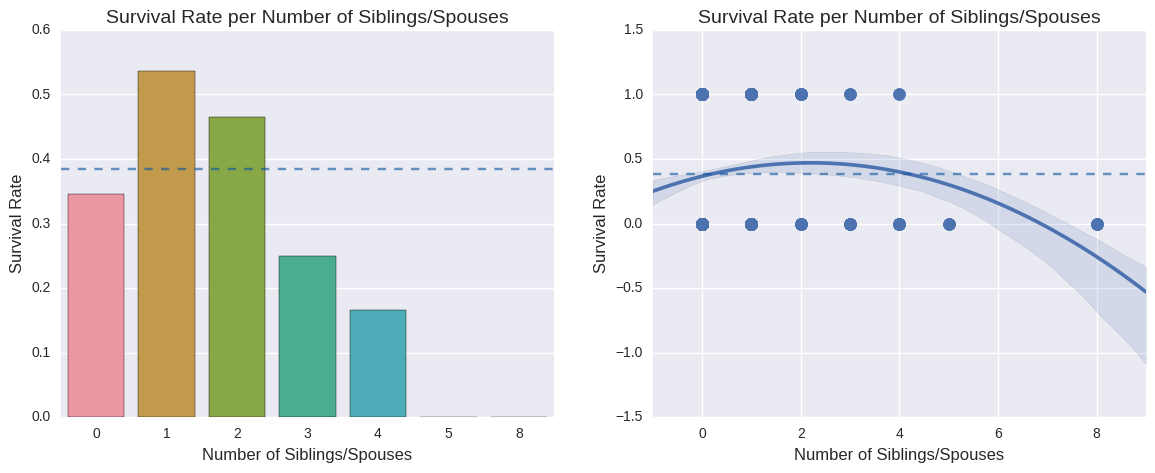

In [32]:
#Create a grouped by "SibSp" DataFrame with the average "Survived"
#No need to dropna() because there are not NaN on "SibSp" or "Survived" variables
SibSp_df = pd.DataFrame(data = titanic_original.groupby("SibSp").agg({"Survived" : "mean"}))
SibSp_df.columns = ["Survival Rate"]

#Plotting the resulting DataFrame
fig = plt.subplots(figsize = (14, 5))

plt.figure(1)

plt.subplot(121)

p = sns.barplot(x="SibSp", y="Survival Rate", ci=None, data=SibSp_df.reset_index())

#Adding the average Survival Rate
plt.axhline(y=0.3838383838383838, ls='dashed', color='#0B559F', alpha=0.6)

p.set_xlabel("Number of Siblings/Spouses", fontsize=12)
p.set_ylabel("Survival Rate", fontsize=12)
p.set_title("Survival Rate per Number of Siblings/Spouses", fontsize=14)

plt.subplot(122)

sns.regplot(x="SibSp", y="Survived", data=titanic_original, order=2, scatter_kws={"s": 80});

#Adding the average Survival Rate
plt.axhline(y=0.3838383838383838, ls='dashed', color='#0B559F', alpha=0.6)

plt.xlabel("Number of Siblings/Spouses", fontsize=12)
plt.ylabel("Survival Rate", fontsize=12)
plt.title("Survival Rate per Number of Siblings/Spouses", fontsize=14)

plt.show()

There is a patern in the plot but as we saw earlier, there is a negative correlation between *Number of Siblings/Spouses* and *Age*.  
Since, the *Number of Siblings/Spouses* doesn't make much sense to affect the *Survival Rate* we can assume that *Age* is a Common Cause for both *Survival Rate* and *Number of Siblings/Spouses*.

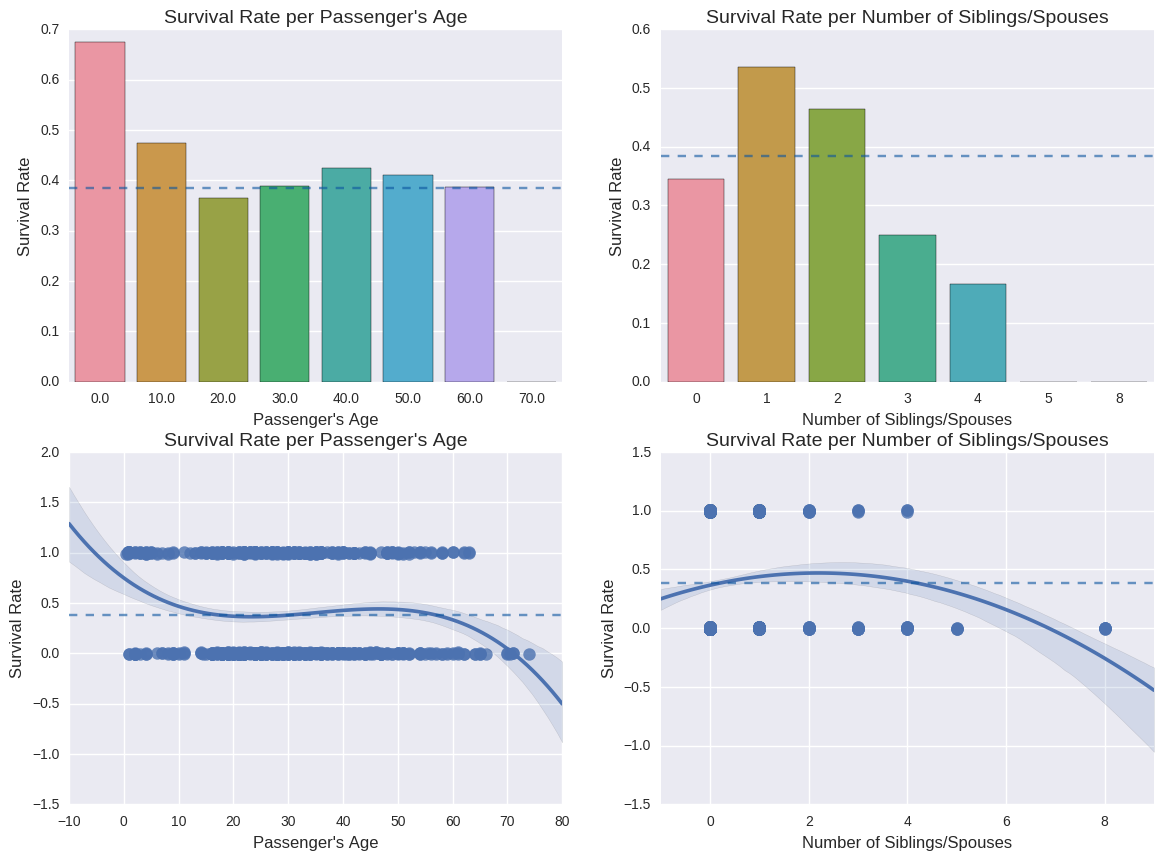

In [33]:
fig = plt.subplots(figsize = (14, 10))

plt.figure(1)

plt.subplot(221)

p = sns.barplot(x="Decade", y="Survived", ci=None, data=dec_df.reset_index())

#Adding the average Survival Rate
plt.axhline(y=0.3838383838383838, ls='dashed', color='#0B559F', alpha=0.6)

p.set_xlabel("Passenger's Age", fontsize=12)
p.set_ylabel("Survival Rate", fontsize=12)
p.set_title("Survival Rate per Passenger's Age", fontsize=14)

plt.subplot(222)

p = sns.barplot(x="SibSp", y="Survival Rate", ci=None, data=SibSp_df.reset_index())

#Adding the average Survival Rate
plt.axhline(y=0.3838383838383838, ls='dashed', color='#0B559F', alpha=0.6)

p.set_xlabel("Number of Siblings/Spouses", fontsize=12)
p.set_ylabel("Survival Rate", fontsize=12)
p.set_title("Survival Rate per Number of Siblings/Spouses", fontsize=14)

plt.subplot(223)
sns.regplot(x="Age", y="Survived", data=dec_df, order=3, y_jitter=0.01, scatter_kws={"s": 80});

#Adding the average Survival Rate
plt.axhline(y=0.3838383838383838, ls='dashed', color='#0B559F', alpha=0.6)

plt.xlabel("Passenger's Age", fontsize=12)
plt.ylabel("Survival Rate", fontsize=12)
plt.title("Survival Rate per Passenger's Age", fontsize=14)

plt.subplot(224)

sns.regplot(x="SibSp", y="Survived", data=titanic_original, order=2, y_jitter=0.01, scatter_kws={"s": 80});

#Adding the average Survival Rate
plt.axhline(y=0.3838383838383838, ls='dashed', color='#0B559F', alpha=0.6)

plt.xlabel("Number of Siblings/Spouses", fontsize=12)
plt.ylabel("Survival Rate", fontsize=12)
plt.title("Survival Rate per Number of Siblings/Spouses", fontsize=14)

plt.show()

This negative corelation between the *Passenger's Age* and the *Number of Siblings/Spouses* can be further highlighted in the following plot.

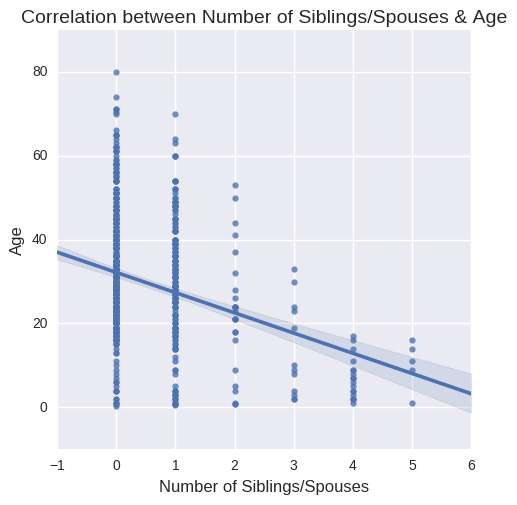

In [34]:
a = pd.DataFrame(data = pd.DataFrame(titanic_original.dropna(subset=['Age'])).dropna(subset=['SibSp']))
sns.lmplot(x="SibSp", y="Age", data=a)

plt.xlabel("Number of Siblings/Spouses", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.title("Correlation between Number of Siblings/Spouses & Age", fontsize=14)

#plt.tight_layout()
plt.show()

## Survival Rate per Number of Parents/Children Aboard

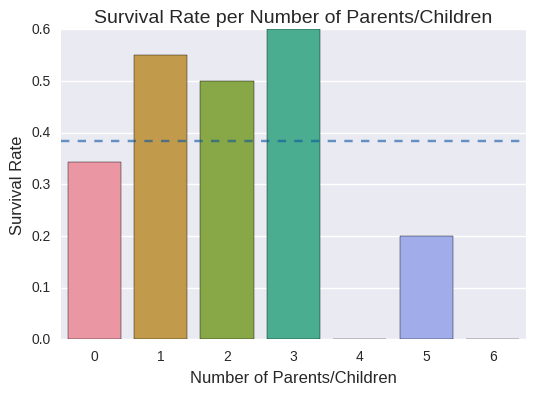

In [35]:
#Create a grouped by "Parch" DataFrame with the average "Survived"
#No need to dropna() because there are not NaN on "Parch" or "Survived" variables
Parch_df = pd.DataFrame(data = titanic_original.groupby("Parch").agg({"Survived" : "mean"}))
Parch_df.columns = ["Survival Rate"]

#Plotting the resulting DataFrame
plt.figure(figsize=(6,4))

p = sns.barplot(x="Parch", y="Survival Rate", ci=None, data=Parch_df.reset_index())

#Adding the average Survival Rate
plt.axhline(y=0.3838383838383838, ls='dashed', color='#0B559F', alpha=0.6)

p.set_xlabel("Number of Parents/Children", fontsize=12)
p.set_ylabel("Survival Rate", fontsize=12)
p.set_title("Survival Rate per Number of Parents/Children", fontsize=14)

plt.show()


The above diagram cannot give a clear picture of a correlation between the *Number of Parents/Children* and the Survival rate. We can say though that the passengers that were traveling with 1 to 3 Parents/Children had a greater Survival Ratio.

## Survival Rate per Fare

We know that the "Higher" the Passenger's Class the higher the fare, so we are expecting a possitive correlation between the Fare and the Survival Rate since we have already concluded that the Passenger's Class was a Critical Factor.

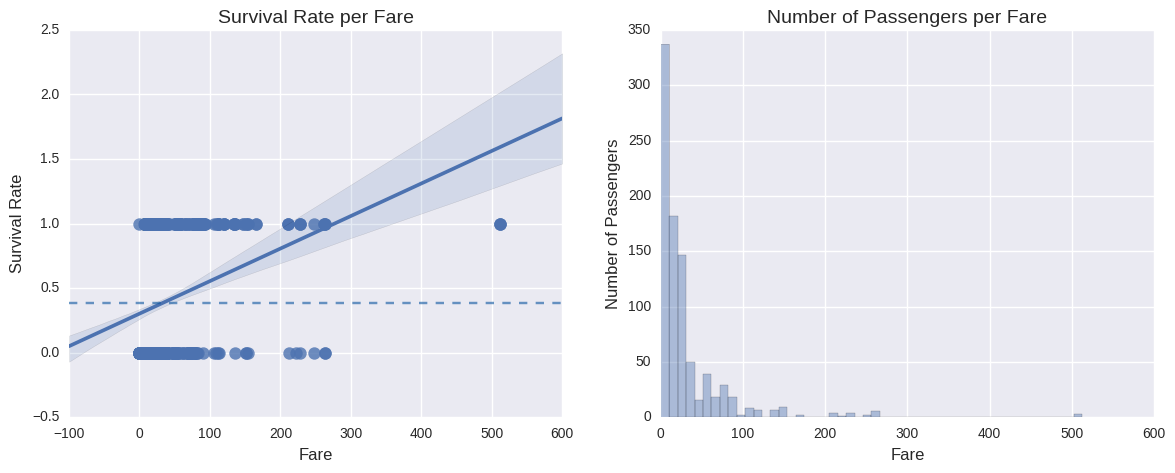

In [36]:
fig = plt.subplots(figsize = (14, 5))

plt.figure(1)

plt.subplot(121)

sns.regplot(x="Fare", y="Survived", data=titanic_original, order=1, scatter_kws={"s": 80});

#Adding the average Survival Rate
plt.axhline(y=0.3838383838383838, ls='dashed', color='#0B559F', alpha=0.6)

plt.xlabel("Fare", fontsize=12)
plt.ylabel("Survival Rate", fontsize=12)
plt.title("Survival Rate per Fare", fontsize=14)

plt.subplot(122)

sns.distplot(titanic_original["Fare"], kde=False)

plt.xlabel("Fare", fontsize=12)
plt.ylabel("Number of Passengers", fontsize=12)
plt.title("Number of Passengers per Fare", fontsize=14)

plt.show()

And if we remove the 300+ fare outliers:

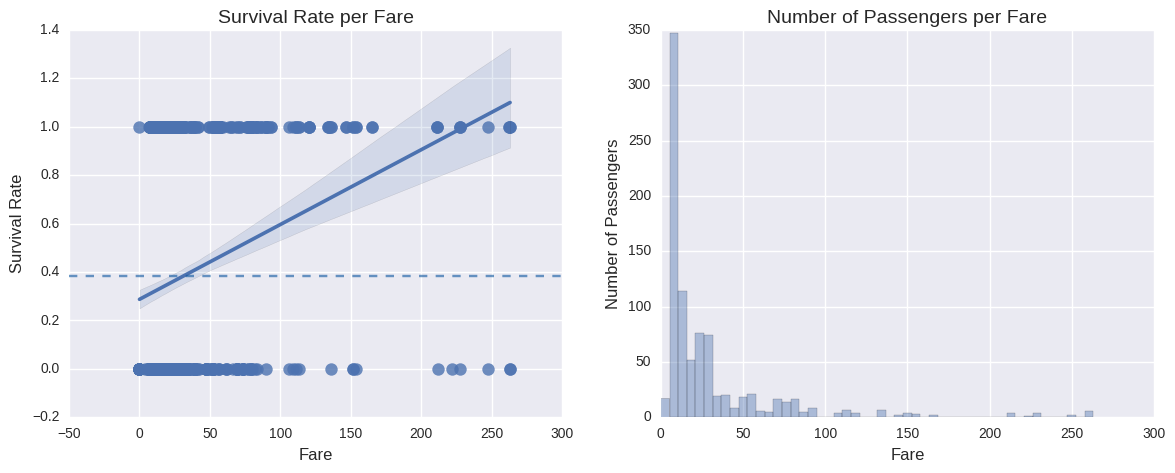

In [37]:
fig = plt.subplots(figsize = (14, 5))

d = titanic_original[titanic_original['Fare'] < 300]

plt.figure(1)

plt.subplot(121)

sns.regplot(x="Fare", y="Survived", data=d, order=1, truncate=True, scatter_kws={"s": 80});

#Adding the average Survival Rate
plt.axhline(y=0.3838383838383838, ls='dashed', color='#0B559F', alpha=0.6)

plt.xlabel("Fare", fontsize=12)
plt.ylabel("Survival Rate", fontsize=12)
plt.title("Survival Rate per Fare", fontsize=14)

plt.subplot(122)

sns.distplot(d["Fare"], kde=False)

plt.xlabel("Fare", fontsize=12)
plt.ylabel("Number of Passengers", fontsize=12)
plt.title("Number of Passengers per Fare", fontsize=14)

plt.show()

As we expected, the *Fare* was a critical Survival Factor.

## Survival Rate per Port of Embarkation

Finally, let's visualize the Survival Rate per Port of Embarkation to find out if the passengers from the three ports had the same Survival Rates.

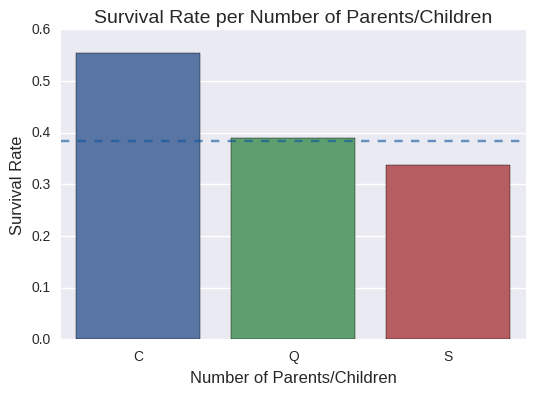

In [38]:
#Drop the NaN values
embarked_df = titanic_original.dropna(subset = ["Embarked"])
embarked_df = pd.DataFrame(data = embarked_df.groupby("Embarked").agg({"Survived" : "mean"}))
embarked_df.columns = ["Survival Rate"]

plt.figure(figsize=(6,4))

p = sns.barplot(x="Embarked", y="Survival Rate", ci=None, data=embarked_df.reset_index())

#Adding the average Survival Rate
plt.axhline(y=0.3838383838383838, ls='dashed', color='#0B559F', alpha=0.6)

p.set_xlabel("Number of Parents/Children", fontsize=12)
p.set_ylabel("Survival Rate", fontsize=12)
p.set_title("Survival Rate per Number of Parents/Children", fontsize=14)

plt.show()

There are significant variations between the three ports.  
Let's explore the allocation of Gender and Passenger's Class on each port. 

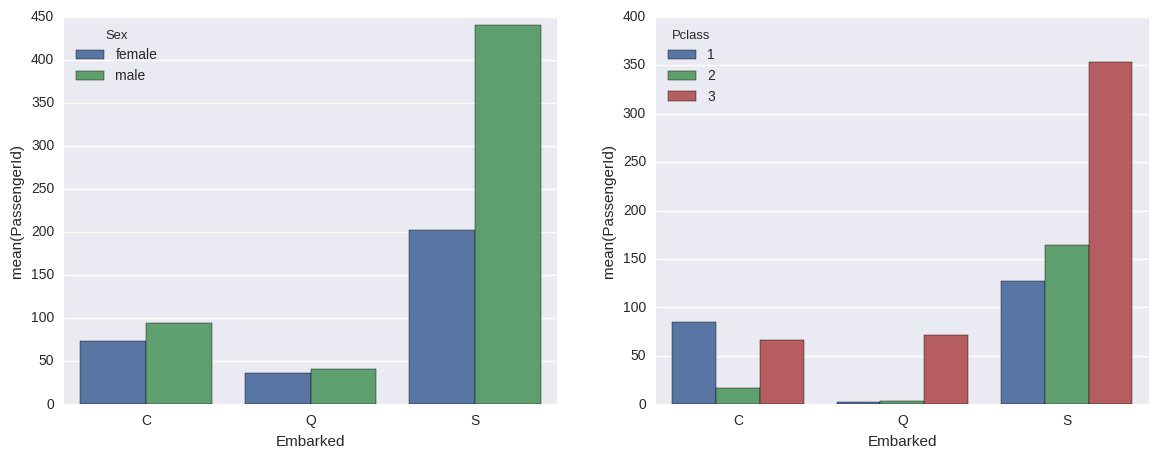

In [39]:
fig = plt.subplots(figsize = (14, 5))

d = titanic_original[titanic_original['Fare'] < 300]

plt.figure(1)

plt.subplot(121)

a = titanic_original.groupby(['Embarked', 'Sex'])
b = a['PassengerId'].count().reset_index()

p = sns.barplot(x='Embarked', y='PassengerId', hue='Sex', data=b,)

plt.subplot(122)

c = titanic_original.groupby(['Embarked', 'Pclass'])
d = c['PassengerId'].count().reset_index()

p = sns.barplot(x='Embarked', y='PassengerId', hue='Pclass', data=d,)

plt.show()

The port with the higher Survival Rate is the one with the most higher ratio of "prestigious" passengers and a good female/male ratio and the one with the lowest Rate the "worst" ratio in both categories. This explain the significant differences between the three ports.

# Conclusions

Following the above analysis we can conclude that the most critical factors for the survival of the passengers were:  
* Gender
* Age
* Socio-economic Status

Women had over 4 times the Survival Rate of men (74.2% against 18.9%) and the "Upper Class" nearly 3 times more chances than the "Lower Class" (63.0% against 24.2%).  
Coming to the age factor, the most privileged were the infants (ages under 5) with a Survival Rate of 67.5%, almost double the average.

Acording to the above statements, someone would expect that a passenger who fulfilled all the above criteria, must have survived. Sadly, the only "Upper Class" girl under 5 in our sample did not survive the accident. 

In [40]:
titanic_original.loc[(titanic_original["Pclass"] == 1) & (titanic_original["Age"] <= 5) & (titanic_original["Sex"] == "female")]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.55,C22 C26,S


The above conclusions are tentative and further statistical analysis is required in order to prove their validity.